In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import platform

In [27]:
# tips 데이터셋 로드
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1. 컬럼의 이름을 변경 -> [총금액, 팁, 성별, 흡연여부, 요일, 시간, 인원]
2. 총금액, 팁 컬럼의 데이터를 소수점 1자리만 두고 반올림
3. 식사 인원과 성별에 따른(그룹화) 팁의 비율의 평균 값을 구하고 그래프 시각화(바그래프)

In [ ]:
# tips.to_csv('tips.csv', index=False)

In [28]:
# 1
tips.columns = ['총금액', '팁', '성별', '흡연여부', '요일', '시간', '인원']
tips

,총금액,팁,성별,흡연여부,요일,시간,인원
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [29]:
# 2
tips[['총금액', '팁']] = tips[['총금액', '팁']].round(1)
#tips['총금액'] = round(tips['총금액'], 1)
#tips['팁'] = round(tips['팁'], 1)
tips

,총금액,팁,성별,흡연여부,요일,시간,인원
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3
3,23.7,3.3,Male,No,Sun,Dinner,2
4,24.6,3.6,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.0,5.9,Male,No,Sat,Dinner,3
240,27.2,2.0,Female,Yes,Sat,Dinner,2
241,22.7,2.0,Male,Yes,Sat,Dinner,2
242,17.8,1.8,Male,No,Sat,Dinner,2


In [30]:
tips['팁 비율'] = tips['팁']/tips['총금액'] * 100
# 식사 인원과 성별에 따른(그룹화) 팁의 비율의 평균 값 구하기
#tips[['인원', '인원']].groupby('성별').agg(['mean'])
#tips.groupby(['인원', '성별'])['팁'].mean()

# 그래프 시각화
#tip_ratio_mean.plot(kind='bar')
#plt.show()
tips

,총금액,팁,성별,흡연여부,요일,시간,인원,팁 비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353
1,10.3,1.7,Male,No,Sun,Dinner,3,16.504854
2,21.0,3.5,Male,No,Sun,Dinner,3,16.666667
3,23.7,3.3,Male,No,Sun,Dinner,2,13.924051
4,24.6,3.6,Female,No,Sun,Dinner,4,14.634146
...,...,...,...,...,...,...,...,...
239,29.0,5.9,Male,No,Sat,Dinner,3,20.344828
240,27.2,2.0,Female,Yes,Sat,Dinner,2,7.352941
241,22.7,2.0,Male,Yes,Sat,Dinner,2,8.810573
242,17.8,1.8,Male,No,Sat,Dinner,2,10.112360


In [33]:
# 그룹화

#tips[['인원', '성별', '팁의 비율']].groupby[['인원', '성별']].agg(['mean'])
group_data = tips[['인원', '성별', '팁 비율']].groupby(['인원', '성별']).mean()
group_data

팁 비율
인원 성별               
1  Male    22.093023
   Female  21.322912
2  Male    16.273796
   Female  17.053626
3  Male    14.763093
   Female  16.025679
4  Male    15.017047
   Female  13.267871
5  Male    13.371547
   Female  17.114094
6  Male    14.953486
   Female  16.306239

In [ ]:
# window에서 matplotlib 폰트 설정 변경
if platform.system() == "Darwin":   # Mac인 경우
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

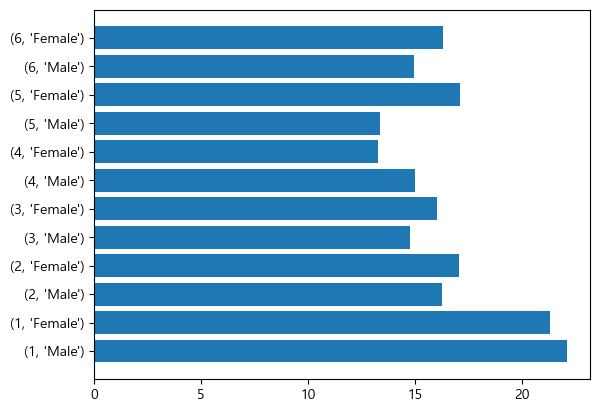

In [43]:
x = list(range(0, len(group_data.index), 1))
y = group_data['팁 비율']

#print(x)
#print(y)
plt.barh(x, y) # barh : bar 그래프를 옆으로 눕힘
plt.yticks(x, group_data.index) # yticks : y축의 x내용을 group_data.index로 바꿔줌
plt.show()

In [67]:
male_data = pd.DataFrame()
female_data = pd.DataFrame()
group_data.loc[1]

,팁 비율
성별,
Male,22.093023
Female,21.322912


In [78]:
# 남자의 데이터프레임
# 여자의 데이터프레임으로 나눈다
male_data = pd.DataFrame()
female_data = pd.DataFrame()

#for i in group_data.index:
#    if i[1] == 'Male':
#        male_data = pd.concat([male_data, group_data.loc[i]])  loc[i] : 시리즈형태
#    else:
#        female_data = pd.concat([female_data, group_data.loc[i]])  loc[[i]] : 리스트형태

for i in group_data.index:
    if i[1] == 'Male':
        male_data = pd.concat([male_data, group_data.loc[[i]]])
    else:
        female_data = pd.concat([female_data, group_data.loc[[i]]])

male_data

,,팁 비율
인원,성별,
1,Male,22.093023
2,Male,16.273796
3,Male,14.763093
4,Male,15.017047
5,Male,13.371547
6,Male,14.953486


In [79]:
group_data.loc[[(1, 'Female')]]

,,팁 비율
인원,성별,
1,Female,21.322912


In [80]:
value = [[1,2,3], [4,5,6]]

df = pd.DataFrame(value, columns=['a', 'b', 'c'])
df

,a,b,c
0,1,2,3
1,4,5,6


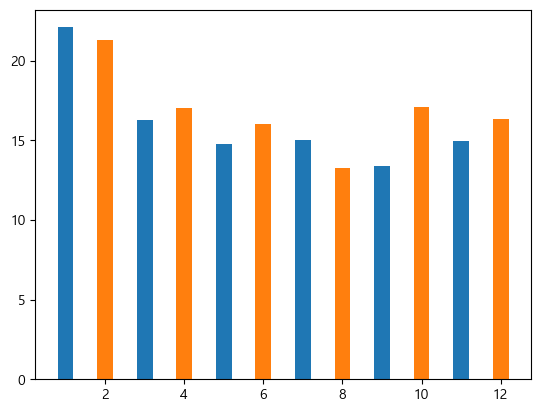

In [81]:
x = list(range(1, len(male_data)*2, 2))
y = male_data['팁 비율']
x2 = list(range(2, (len(female_data)+1)*2, 2))
y2 = female_data['팁 비율']

plt.bar(x, y, width=0.4)
plt.bar(x2, y2, width=0.4)
plt.show()

### pivot_table
1. 그룹화
2. 인덱스, 컬럼을 기준으로 그룹화
3. 데이터 집계를 나타낸다

In [82]:
pivot_data = pd.pivot_table(
    tips,
    index = '인원',
    columns = '성별',
    values = ['팁 비율'],
    aggfunc = 'mean'
)

<Axes: xlabel='인원'>

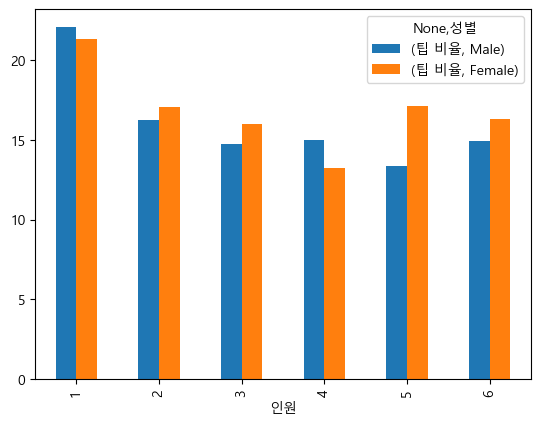

In [83]:
pivot_data.plot.bar()